<a href="https://colab.research.google.com/github/jhay20ng/UpData/blob/main/1_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# 필요 라이브러리 및 모듈 삽입
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing #사이킷런 데이터셋 중 캘리포니아 집값데이터셋 사용.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형모델 라이브러리
from sklearn.metrics import mean_squared_error

In [99]:
housing = fetch_california_housing()
X_calif = pd.DataFrame(housing.data)
y_calif = pd.DataFrame(housing.target)
df = pd.concat([X_calif,y_calif],axis=1)

In [100]:
len(df) #데이터의 개수

20640

In [101]:
df.head()

,0,1,2,3,4,5,6,7,0
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


열의 정보가 없으므로 아래의 코드를 통해 데이터의 이름을 알아보고 적용시켜준다.

In [102]:
feature = housing.feature_names
print(feature)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


: 속성 정보:
- MedInc  :블럭 그룹의 MedInc 중위 소득
- HouseAge:블럭 그룹의 하우스 연령 중위수
- AveRooms: 가구당 평균 객실 수
- AveBedrms: 가구당 평균 침실 수
- Population :모집단 블럭군 모집단
- AveOccup: 평균 가구원 수
- Latitude:위도 블록 그룹 위도
- Longitude:경도 블록 그룹 경도


In [103]:
col_calif = np.append(feature,['target'])
df.columns = col_calif
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
df.info() #분석결과 결측치는 없다. 결측치 : 빠진 데이터 값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [105]:
df.describe() # 데이터셋 요약

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [106]:
data = pd.DataFrame(data=housing.data, columns=feature)
target = pd.Series(data=housing.target, name='target')

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2,random_state=26) # 학습과 테스트 데이터를 8:2으로 분할하여 모델학습.

In [107]:
house_model = LinearRegression()
house_model.fit(X_train, Y_train) # 선형회귀모델에 필요한 변수를 전달

LinearRegression()

In [108]:
predicted_house = house_model.predict(X_test) #선형회귀모델

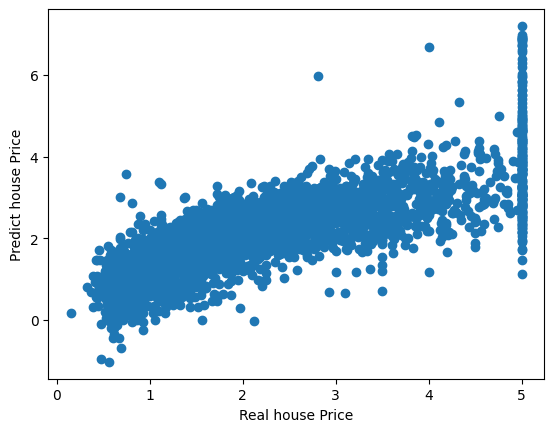

In [109]:
plt.scatter(Y_test, predicted_house)
plt.xlabel("Real house Price")
plt.ylabel("Predict house Price")
plt.show()

In [110]:
score = house_model.score(X_test,Y_test) # 결정계수
rmse = np.sqrt(mean_squared_error(Y_test,predicted_house))
print(score) #약 60%의 정확도를 보여준다고 해석 할수 있다.
print(rmse)

0.6095763590285646
0.711929785908725


In [111]:
slope = house_model.coef_ #기울기
intercept = house_model.intercept_ #y절편

print(slope)
print(intercept)
print(slope[0])

[ 4.38514814e-01  9.54967271e-03 -1.07228988e-01  6.42436704e-01
 -2.67284676e-06 -4.10272537e-03 -4.22055386e-01 -4.35499275e-01]
-37.04274339257758
0.43851481358712924


In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = np.arange(0,1.1,0.1)


ridge = Ridge()
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge,param_grid)
ridge_model.fit(X_train,Y_train)

predicted_house = ridge_model.predict(X_test)

score = ridge_model.score(X_test,Y_test) # 결정계수
rmse = np.sqrt(mean_squared_error(Y_test,predicted_house))
print(ridge_model.best_params_)
print(score)
print(rmse)

{'alpha': 1.0}
0.6095762645637184
0.711929872036109


In [113]:
from sklearn.linear_model import Lasso

alpha = np.arange(0,1.1,0.1)

lasso = Lasso()
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso,param_grid)
lasso_model.fit(X_train,Y_train)

predicted_house = lasso_model.best_estimator_.predict(X_test)

score = lasso_model.best_estimator_.score(X_test,Y_test) # 결정계수
rmse = np.sqrt(mean_squared_error(Y_test,predicted_house))
print(lasso_model.best_params_)
print(score)
print(rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e+03, tolerance: 1.757e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

{'alpha': 0.0}
0.6095763590285647
0.7119297859087249


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.365e+03, tolerance: 2.212e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


house_model[0]만 고려했을때 x의 기울기는 약0.45이고, y절편은 약 -36.25이므로
예측된  선형 회귀 방정식은 Y = 0.45*x-36.25 이다.

하지만 이 데이터는 독립변수가 여러개이므로 전부 더해주어야 모든 독립변수들에 대한 종속변수를 예측할수 있다.

Y = 4.50428585e-01*X1+9.84513087e-03*X2+(-1.24941947e-01)*X3+6.80558497e-01*X4+
 (-3.60309824e-06)*X4+(-3.98709642e-03)*X5+(-4.13166528e-01)*X6+(-4.26298680e-01)*X7-36.257346644215595
 이 내가 예측한 선형회귀모델의 식이다.